In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


In [4]:
df = pd.read_csv('mumbai.csv')

In [5]:
df.columns

Index(['name', 'latitude', 'longitude', 'datetime', 'tempmax', 'tempmin',
       'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'precipcover', 'preciptype', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'severerisk',
       'moonphase', 'conditions', 'description'],
      dtype='object')

In [6]:
df = df[['tempmax', 'tempmin',
       'temp','feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'winddir',
       'visibility', 'conditions']]

In [26]:
df

,tempmax,tempmin,temp,feelslike,dew,humidity,precip,precipprob,winddir,visibility,conditions
0,31.3,19.3,25.0,25.1,16.0,58.9,0.0,0,322.1,2.5,Clear
1,28.9,17.9,24.4,24.5,15.1,57.3,0.0,0,319.8,2.5,Clear
2,30.6,19.1,25.0,25.3,18.9,70.3,0.0,0,287.4,2.1,Clear
3,30.6,19.1,25.2,25.5,18.9,69.8,0.0,0,324.2,2.0,Clear
4,30.7,20.7,25.2,25.4,17.6,64.3,0.0,0,323.8,2.7,Clear
...,...,...,...,...,...,...,...,...,...,...,...
995,28.0,25.9,26.7,29.0,25.8,95.0,135.0,100,272.6,2.3,"Rain, Partially cloudy"
996,28.0,24.9,26.0,26.7,25.7,98.2,266.0,100,251.7,1.9,"Rain, Partially cloudy"
997,30.2,24.9,27.4,31.3,25.8,91.6,0.5,100,181.9,2.9,"Rain, Partially cloudy"
998,30.0,26.0,28.0,32.8,25.6,86.9,0.0,0,251.8,3.1,Partially cloudy


In [27]:
df.isnull().sum().sort_values(ascending=False)


tempmax       0
tempmin       0
temp          0
feelslike     0
dew           0
humidity      0
precip        0
precipprob    0
winddir       0
visibility    0
conditions    0
dtype: int64

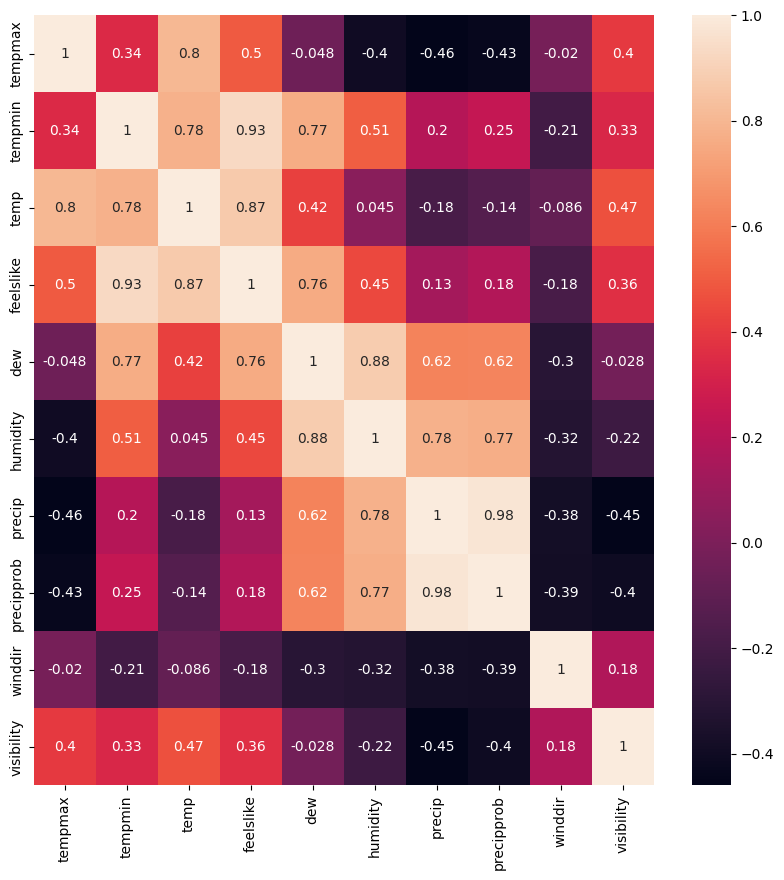

In [28]:
corrmat = df.corr(method = "spearman", numeric_only = 'silence' )
plt.figure(figsize=(10,10))
g=sns.heatmap(corrmat,annot=True)

In [29]:
df.corr?

Signature:
df.corr(
    method: 'str | Callable[[np.ndarray, np.ndarray], float]' = 'pearson',
    min_periods: 'int' = 1,
    numeric_only: 'bool | lib.NoDefault' = <no_default>,
) -> 'DataFrame'
Docstring:
Compute pairwise correlation of columns, excluding NA/null values.

Parameters
----------
method : {'pearson', 'kendall', 'spearman'} or callable
    Method of correlation:

    * pearson : standard correlation coefficient
    * kendall : Kendall Tau correlation coefficient
    * spearman : Spearman rank correlation
    * callable: callable with input two 1d ndarrays
        and returning a float. Note that the returned matrix from corr
        will have 1 along the diagonals and will be symmetric
        regardless of the callable's behavior.
min_periods : int, optional
    Minimum number of observations required per pair of columns
    to have a valid result. Currently only available for Pearson
    and Spearman correlation.
numeric_only : bool, default True
    Include only `flo

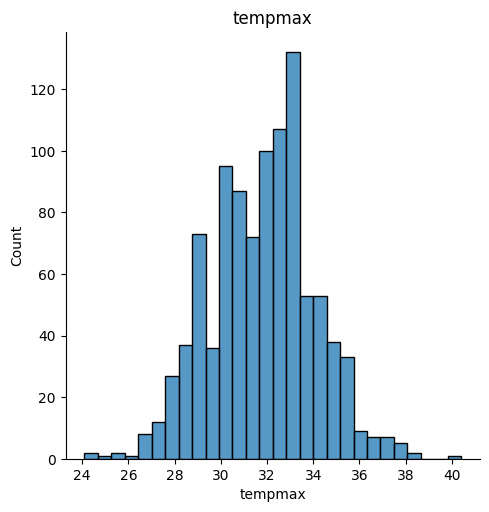

<Figure size 1500x1500 with 0 Axes>

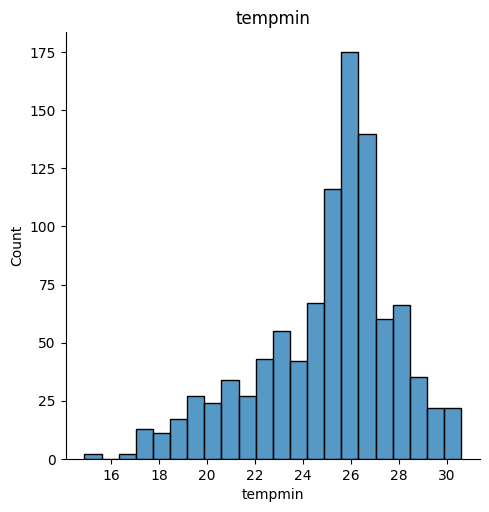

<Figure size 1500x1500 with 0 Axes>

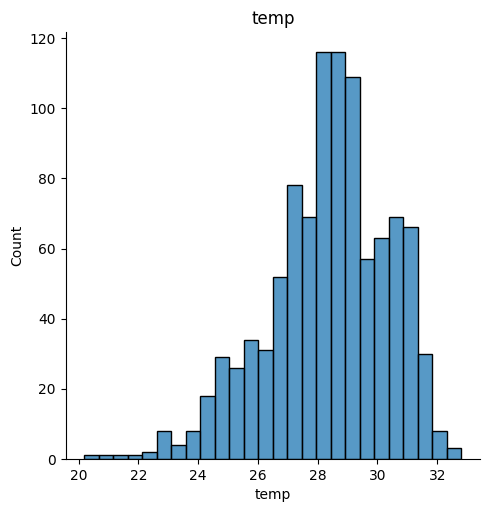

<Figure size 1500x1500 with 0 Axes>

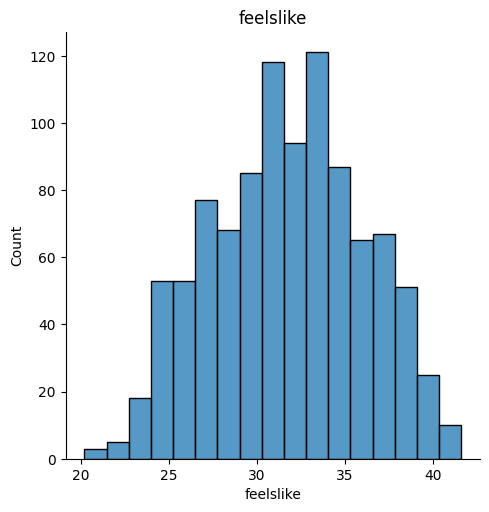

<Figure size 1500x1500 with 0 Axes>

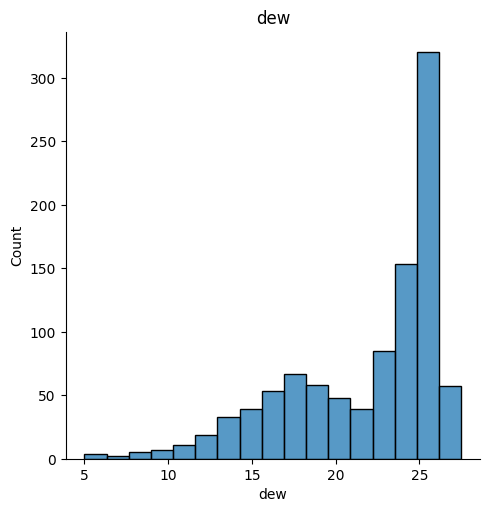

<Figure size 1500x1500 with 0 Axes>

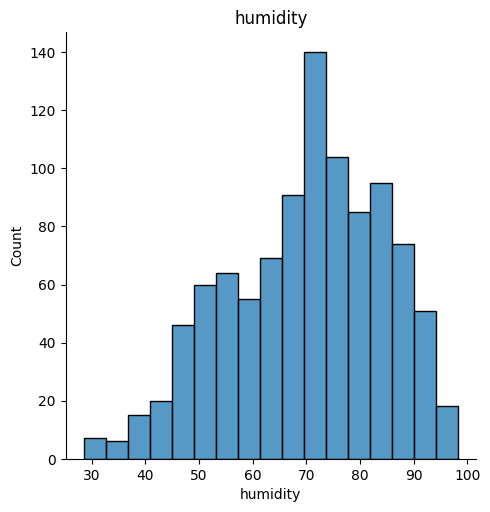

<Figure size 1500x1500 with 0 Axes>

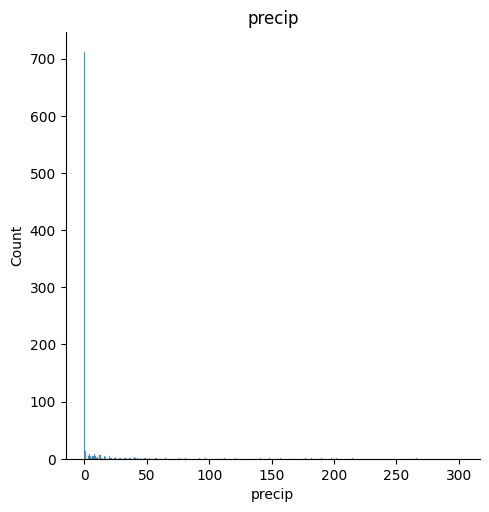

<Figure size 1500x1500 with 0 Axes>

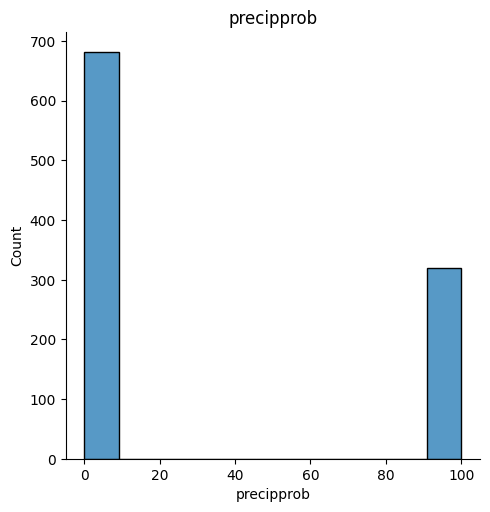

<Figure size 1500x1500 with 0 Axes>

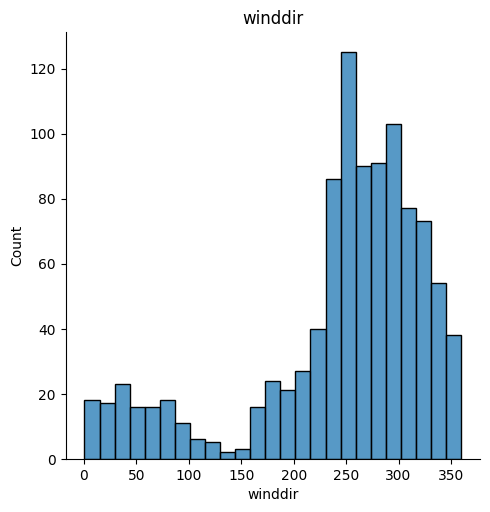

<Figure size 1500x1500 with 0 Axes>

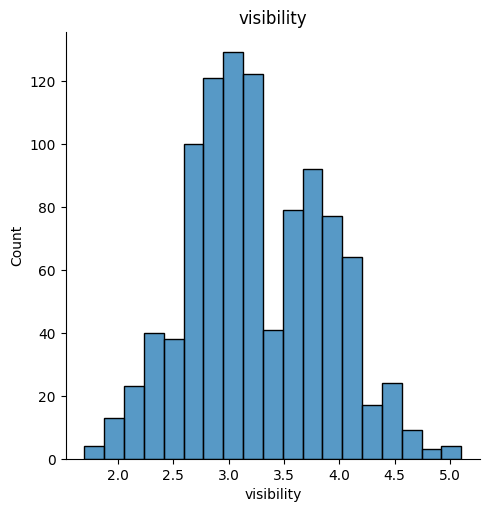

<Figure size 1500x1500 with 0 Axes>

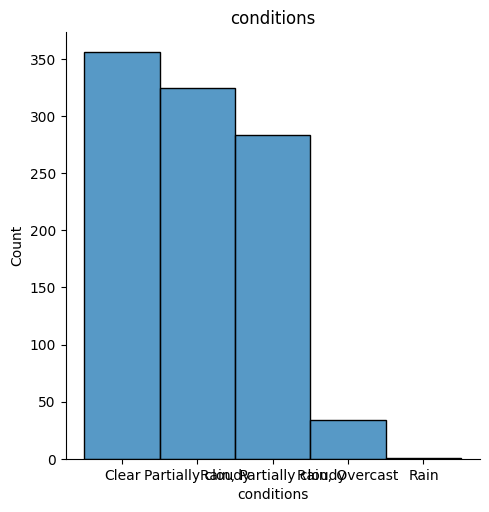

<Figure size 1500x1500 with 0 Axes>

In [30]:
for feature in df:
    data=df.copy()
    sns.displot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

ValueError: could not convert string to float: 'Clear'

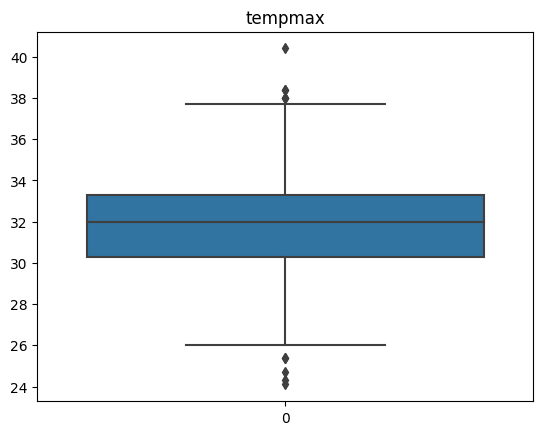

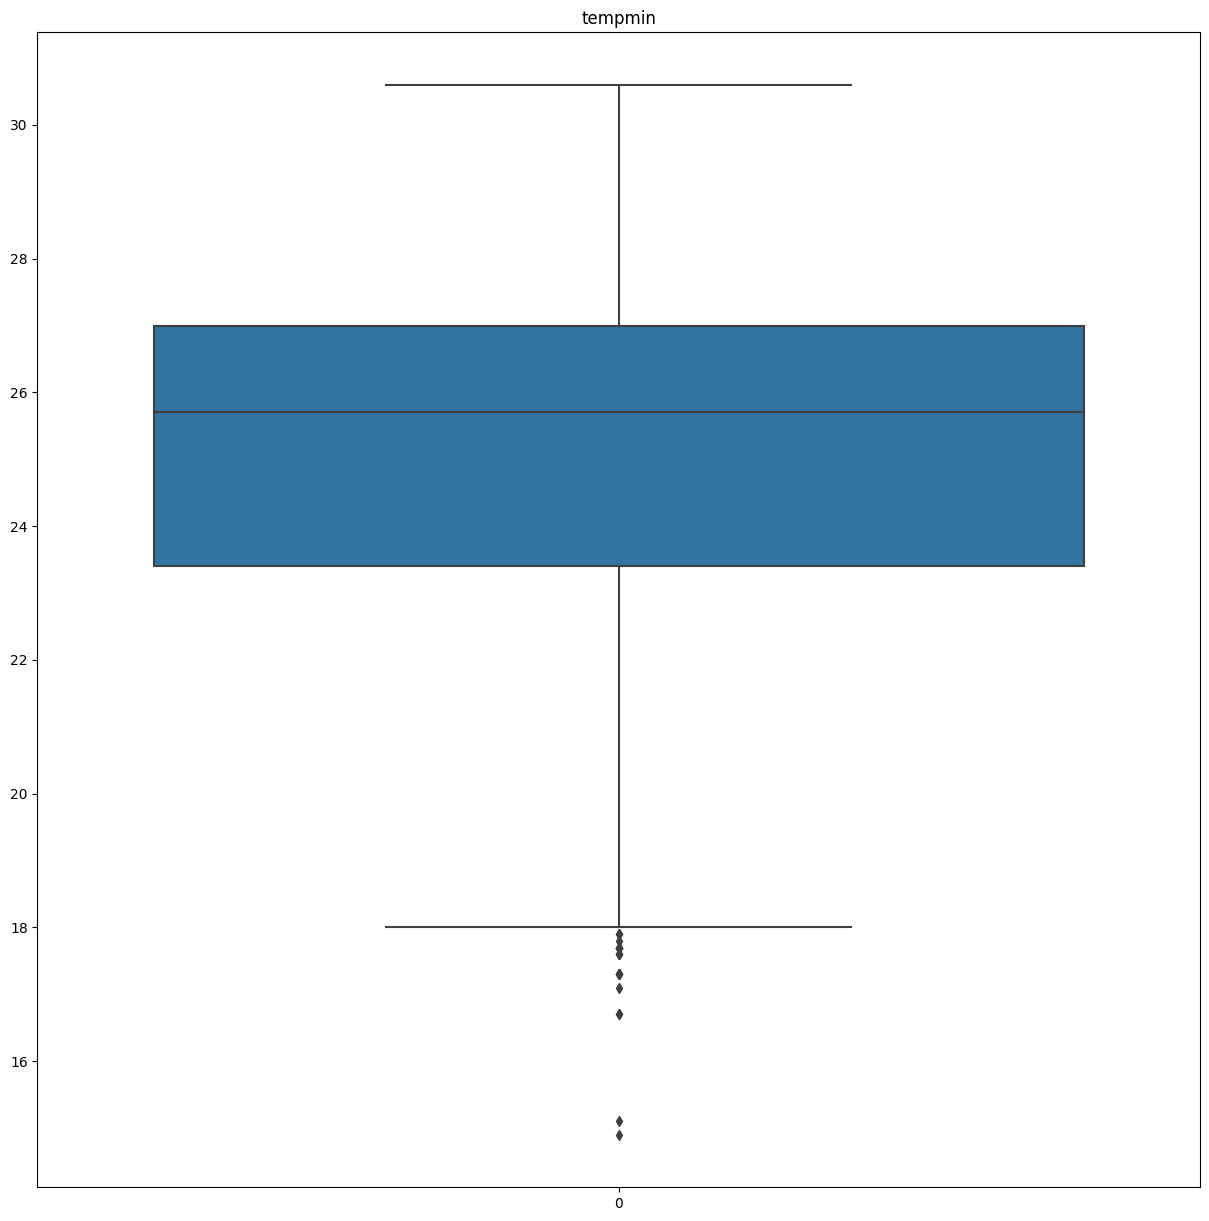

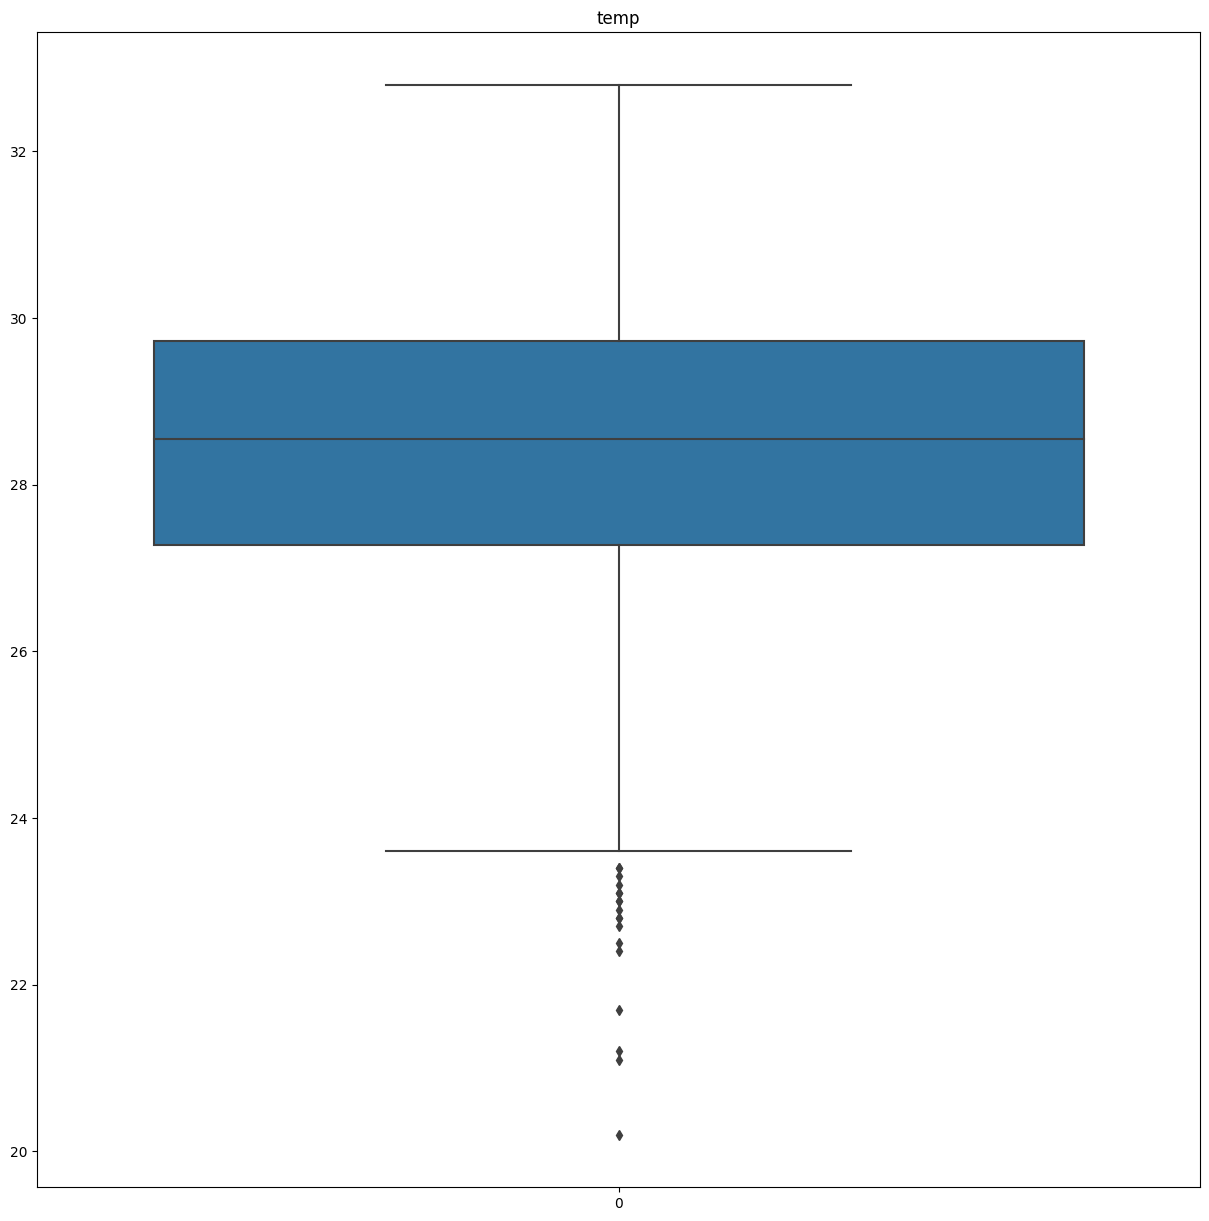

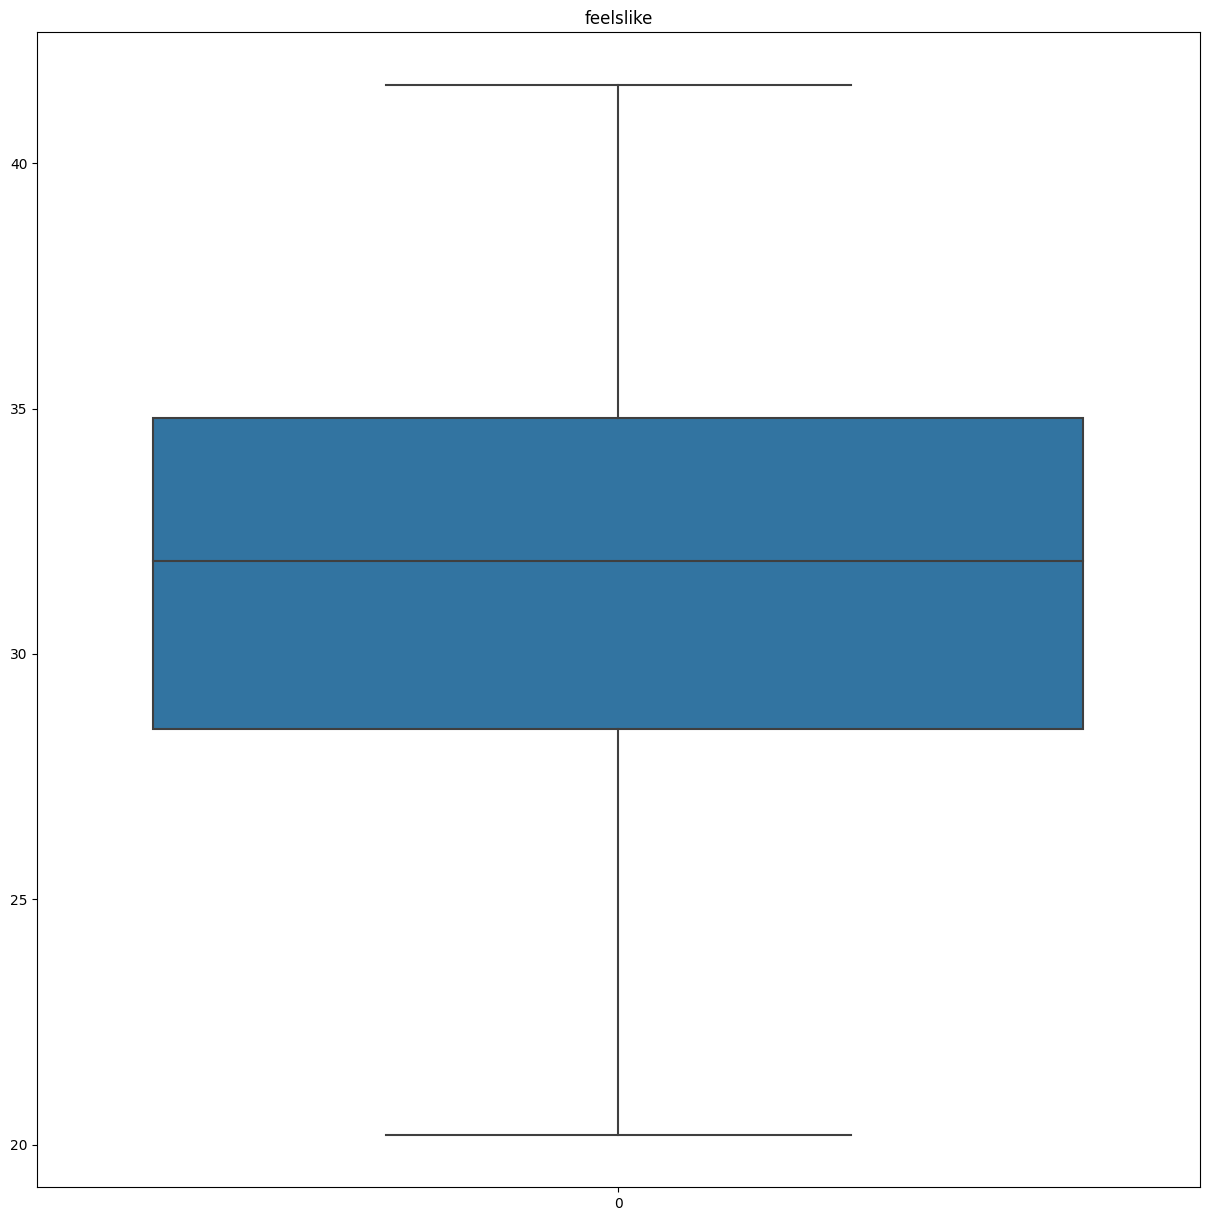

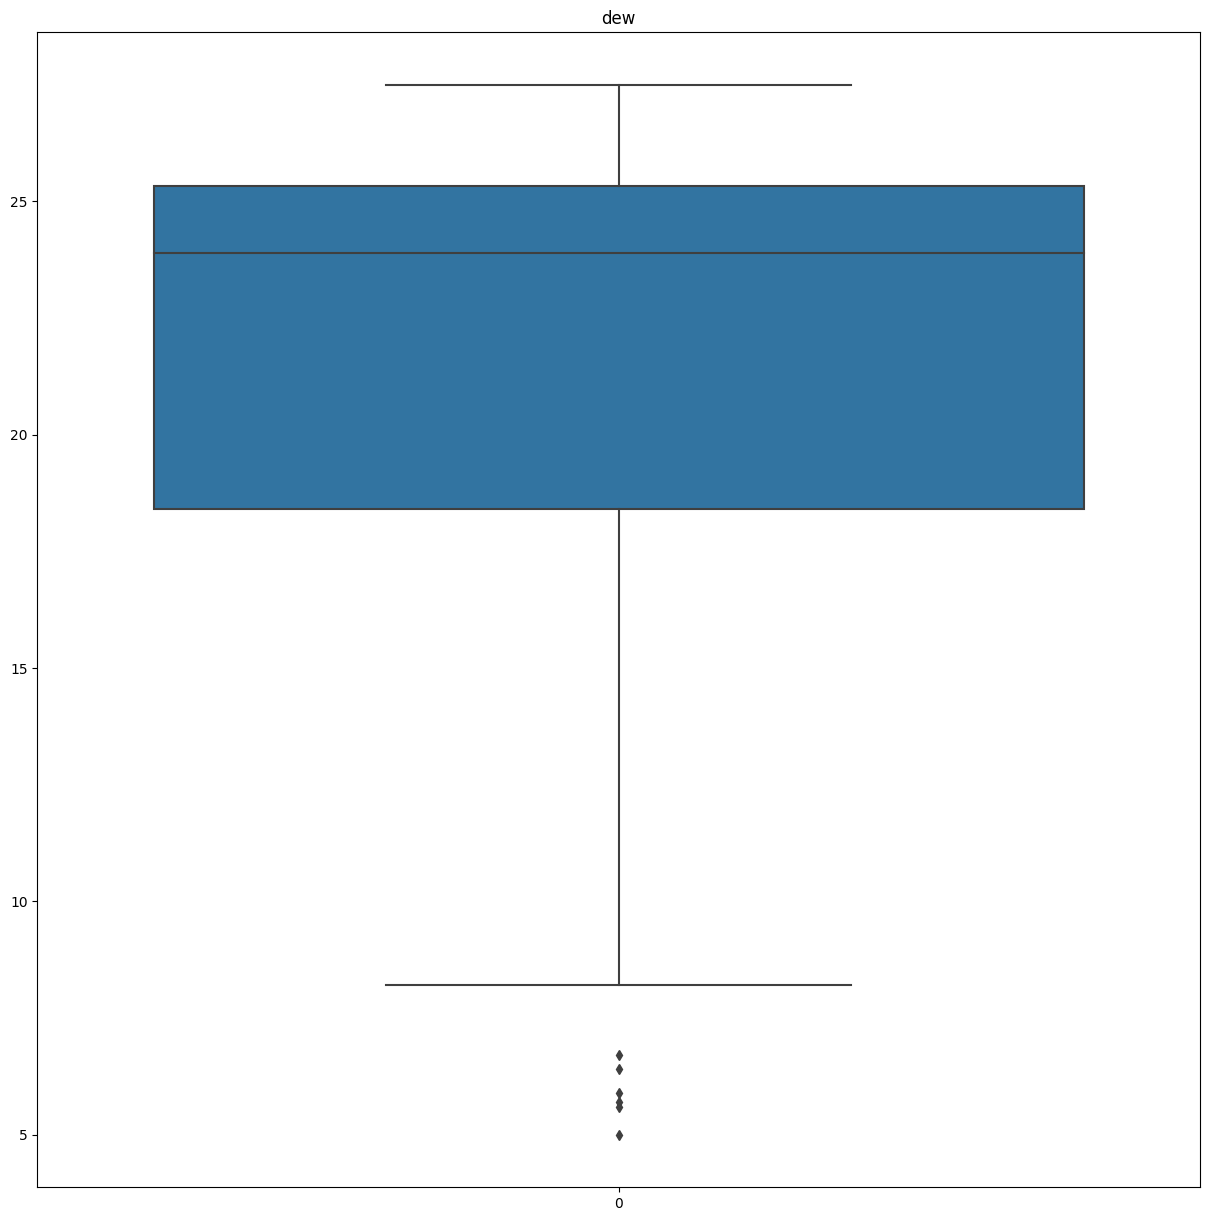

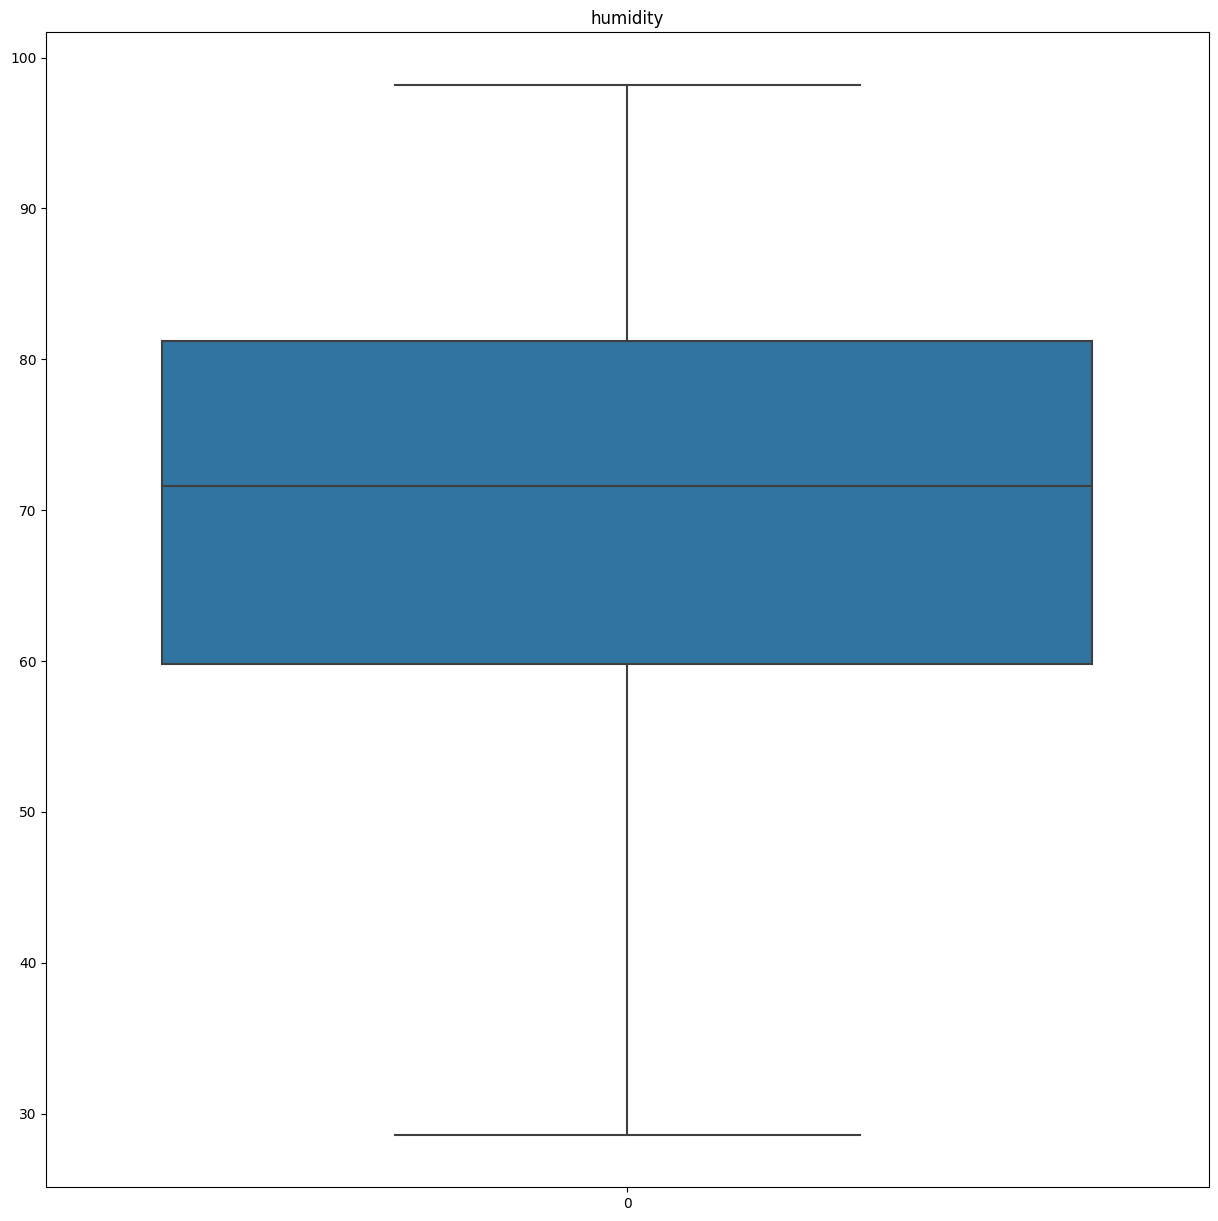

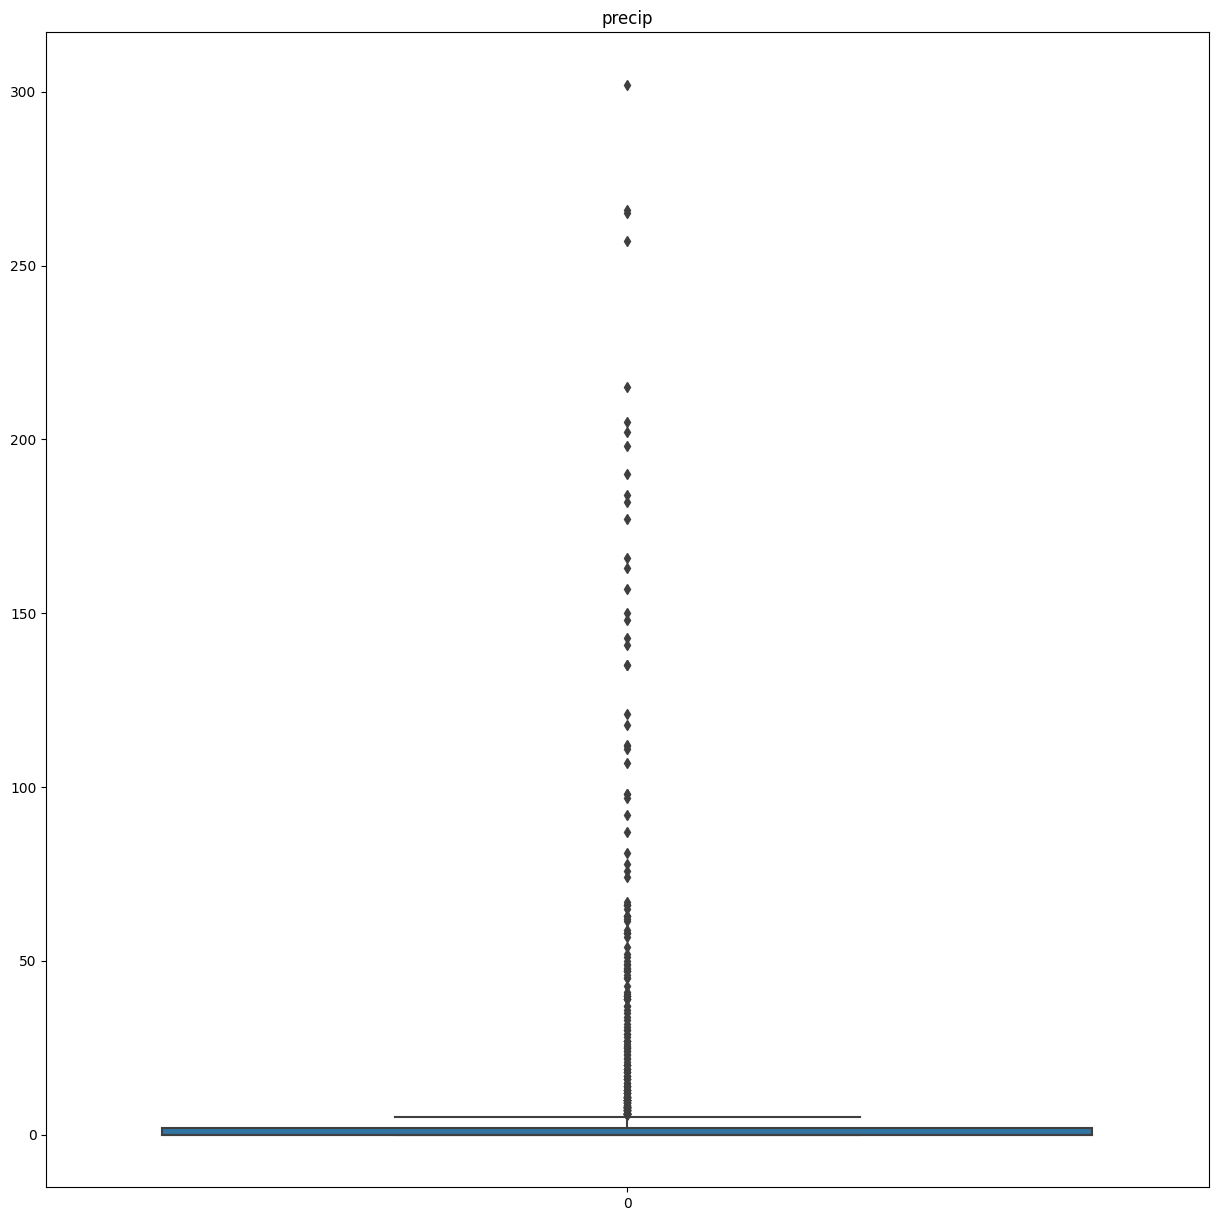

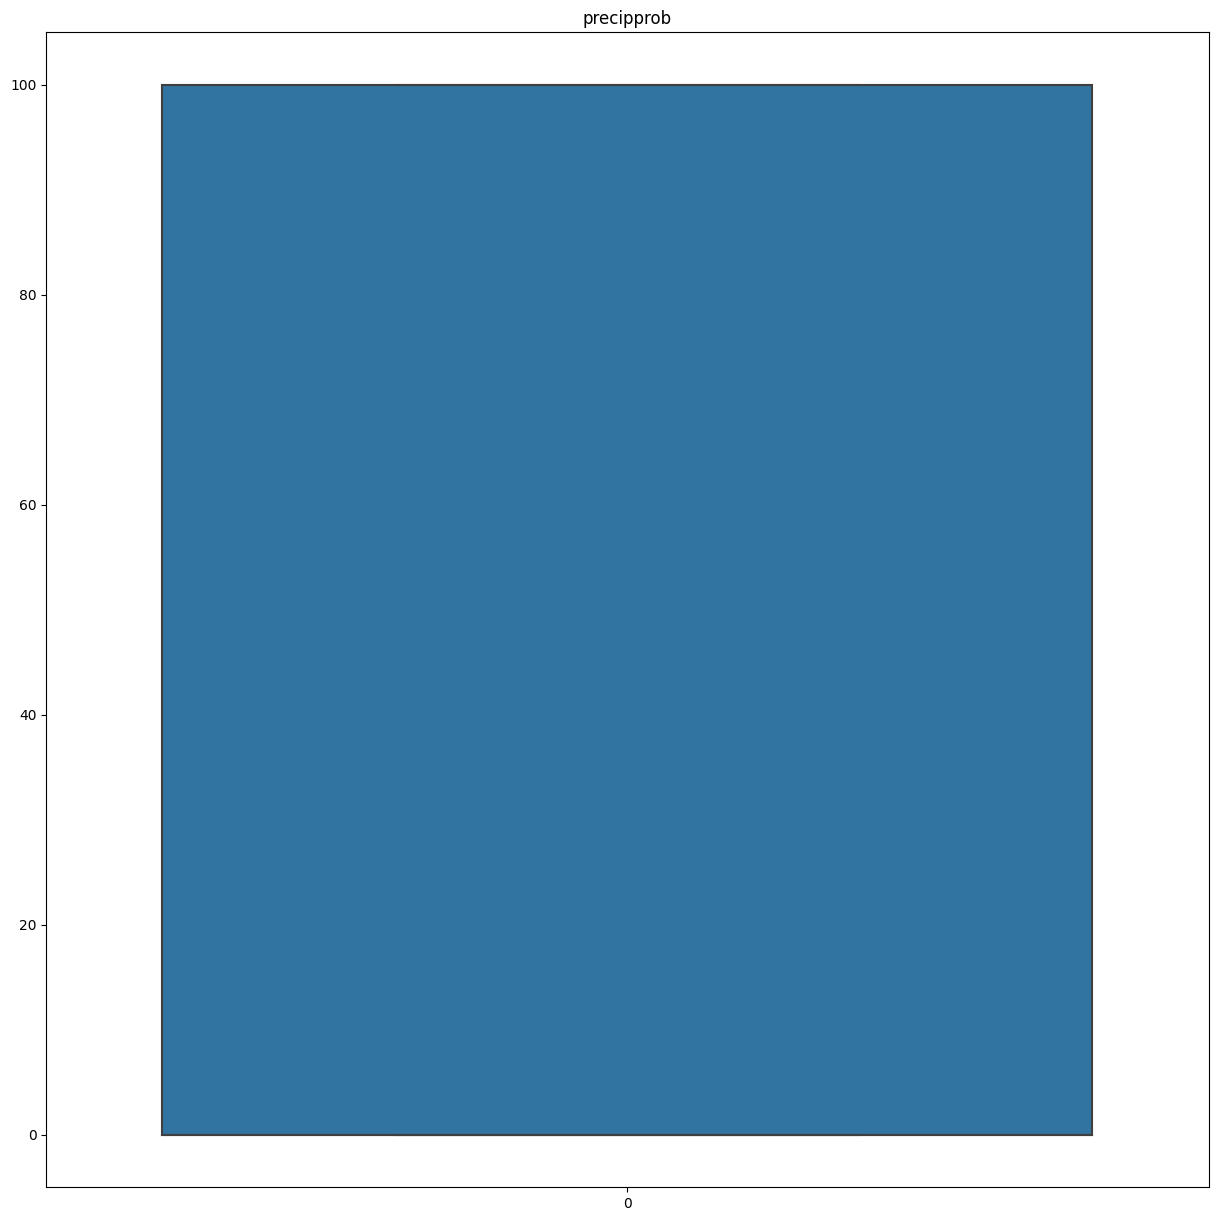

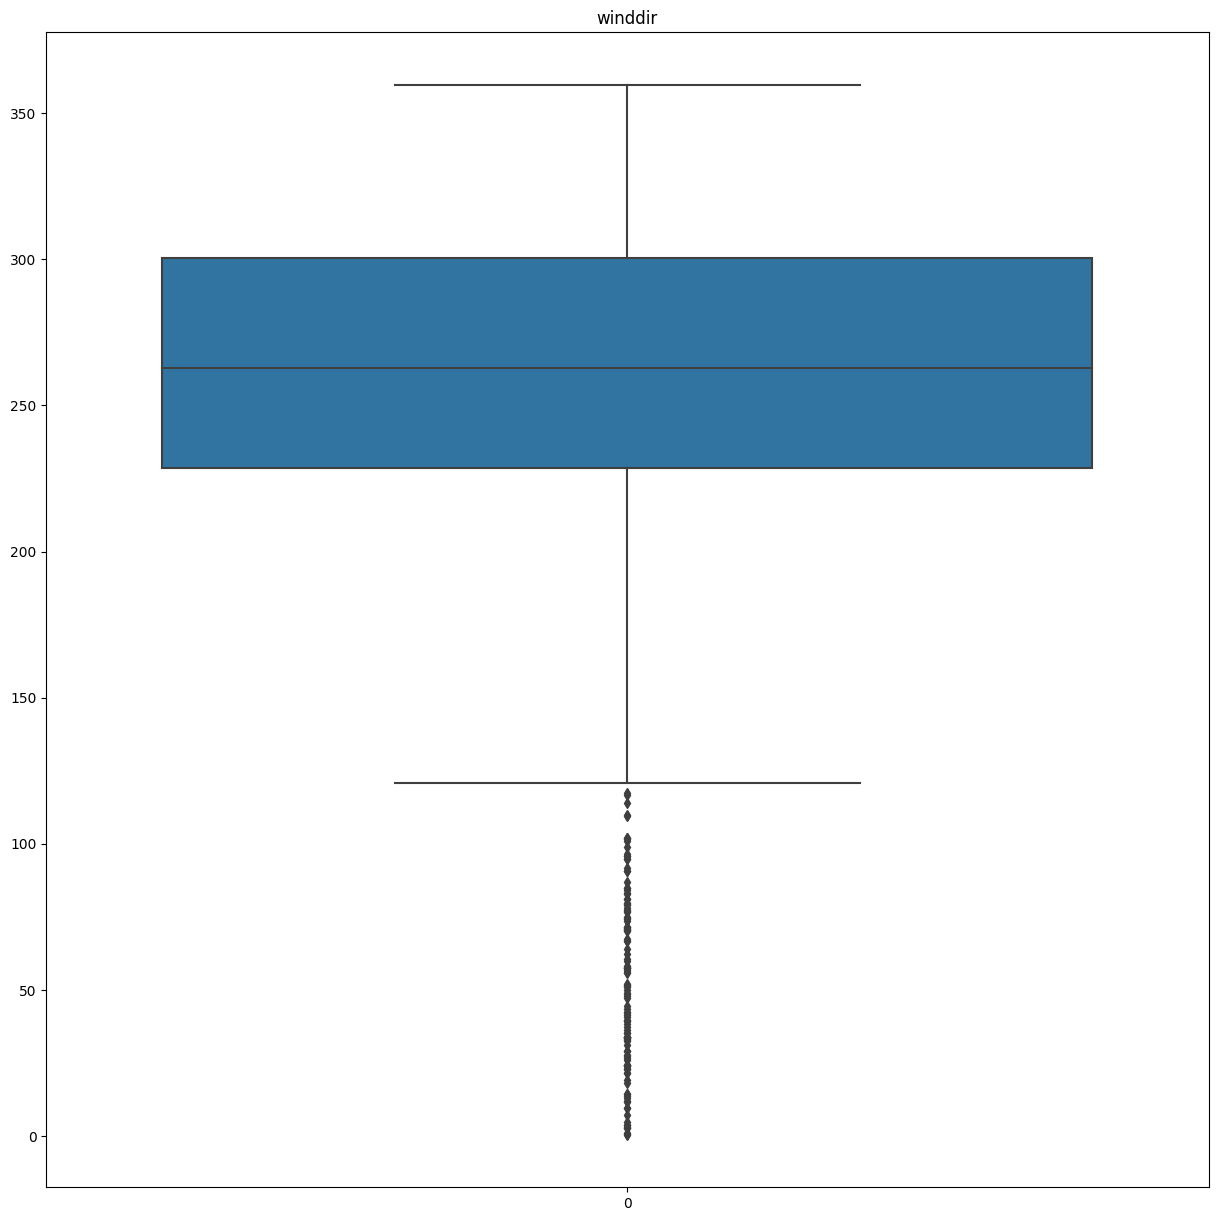

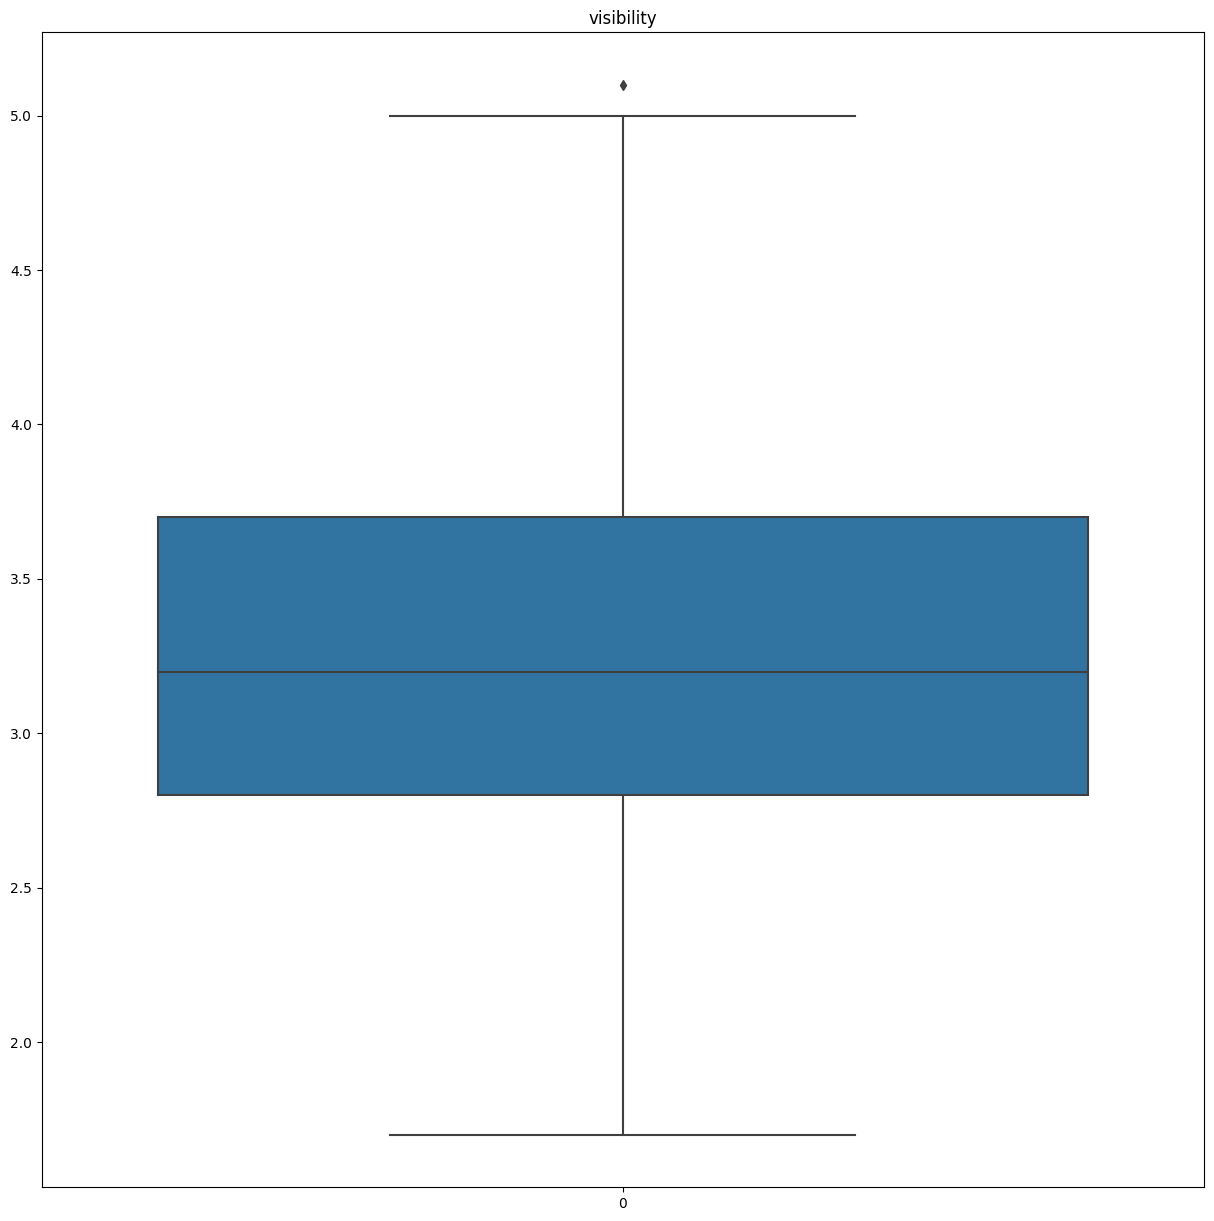

<Figure size 1500x1500 with 0 Axes>

In [31]:
for feature in df:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

tempmax


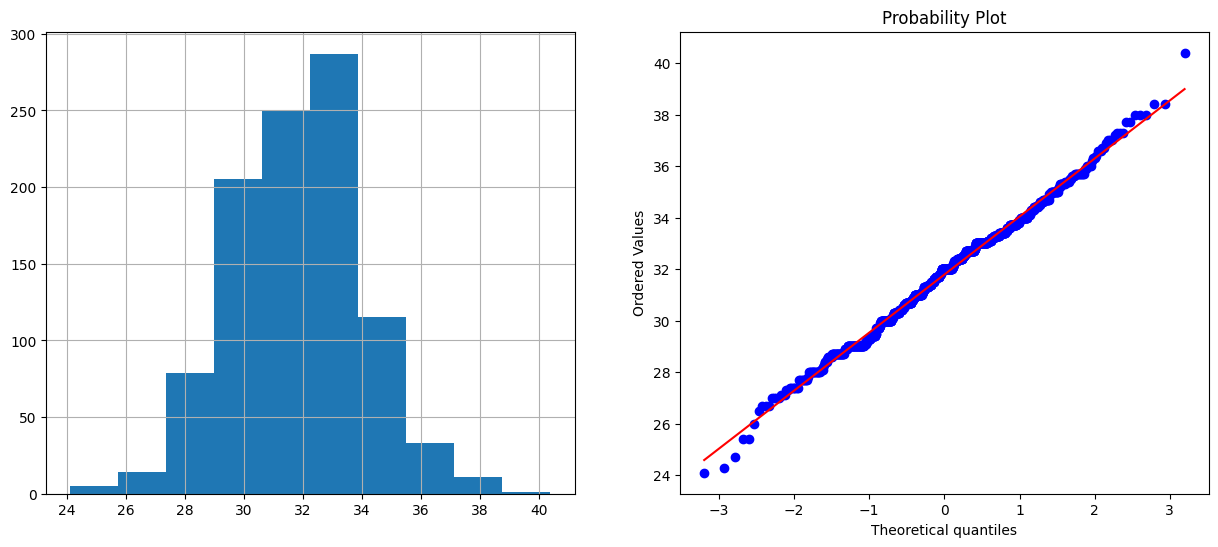

tempmin


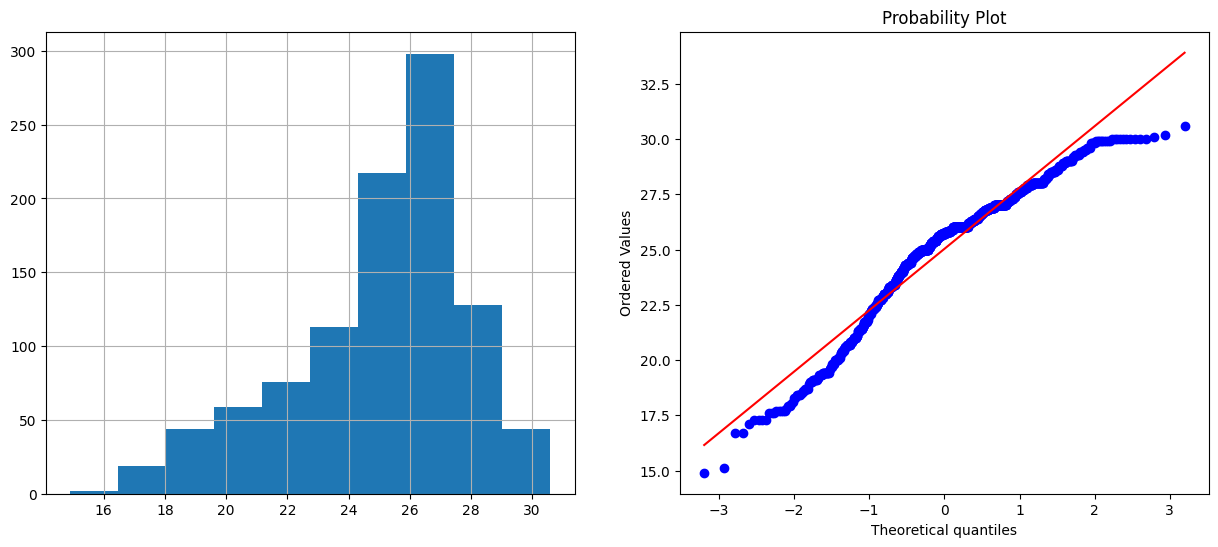

temp


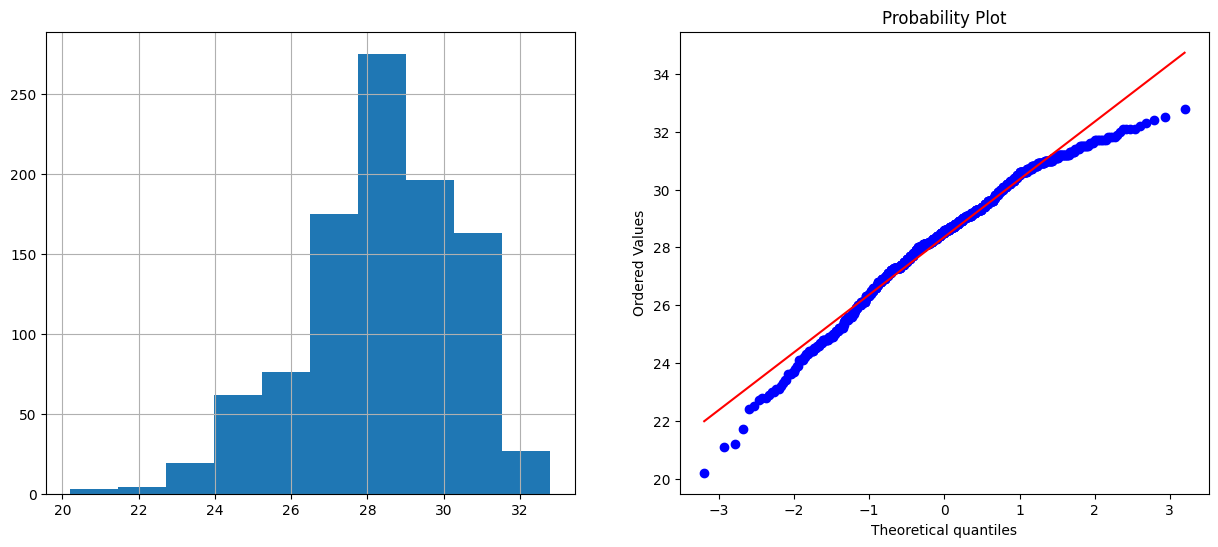

feelslike


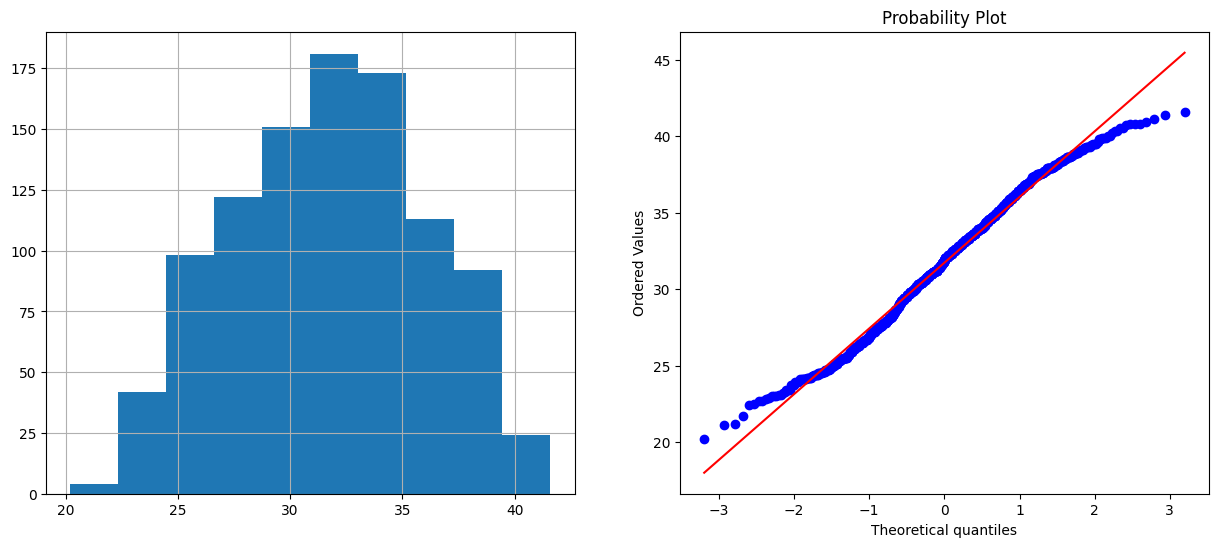

dew


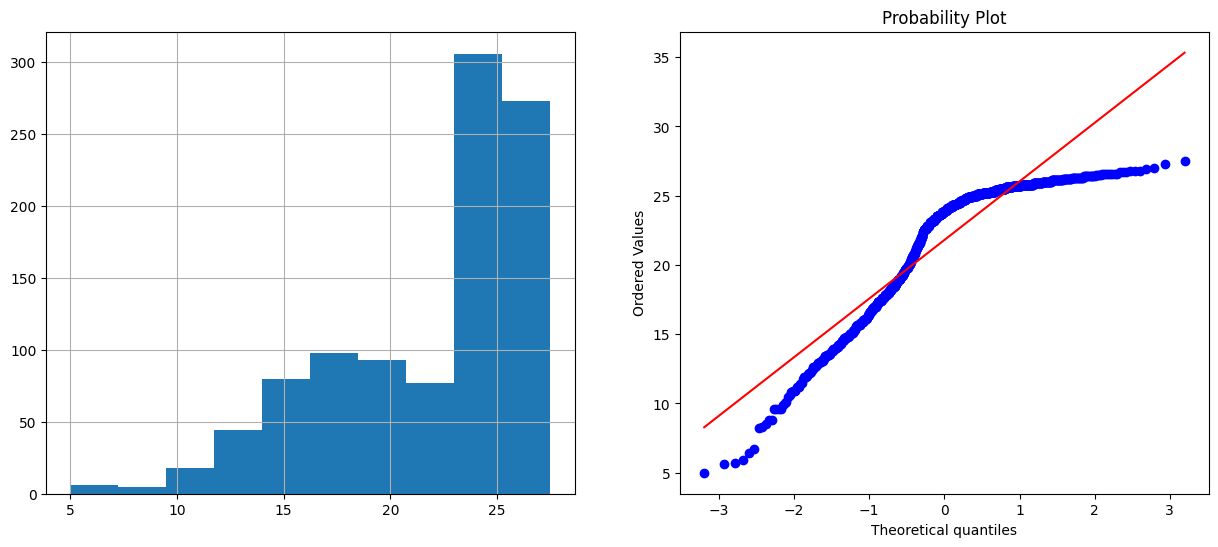

humidity


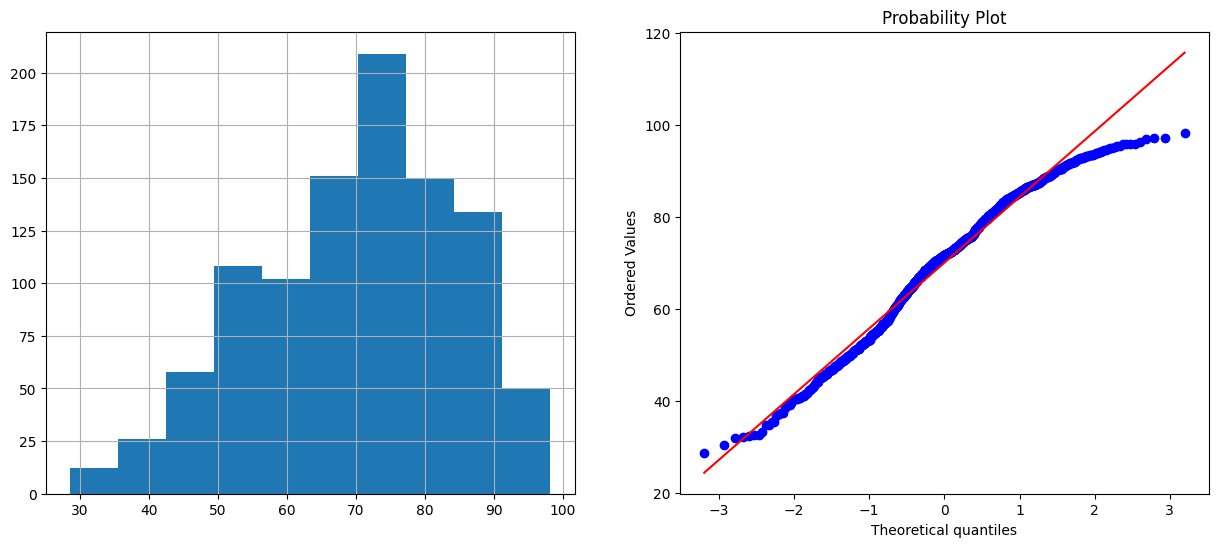

precip


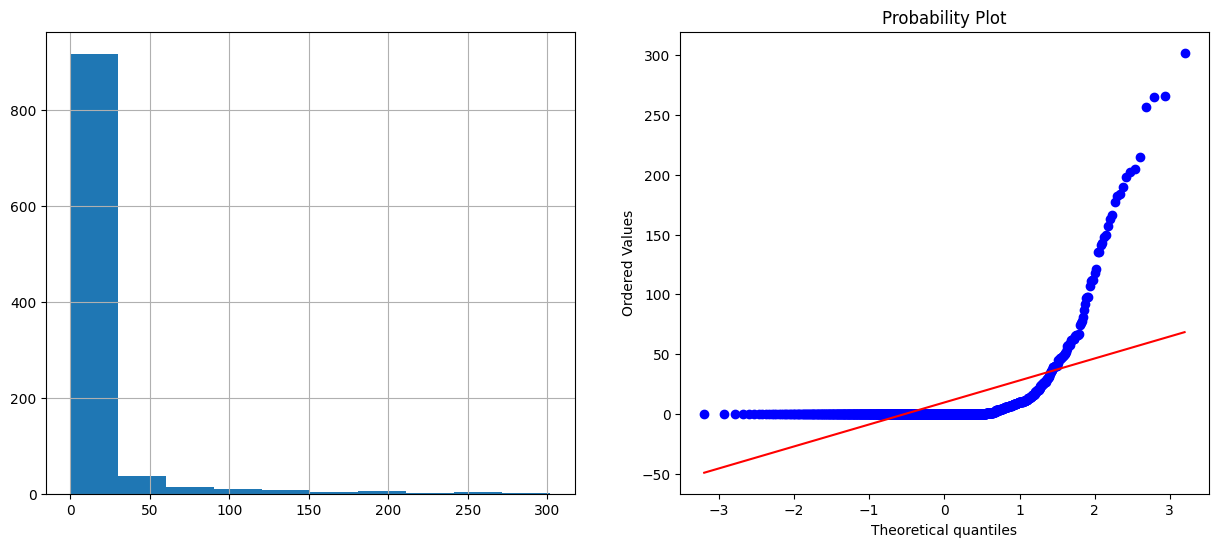

precipprob


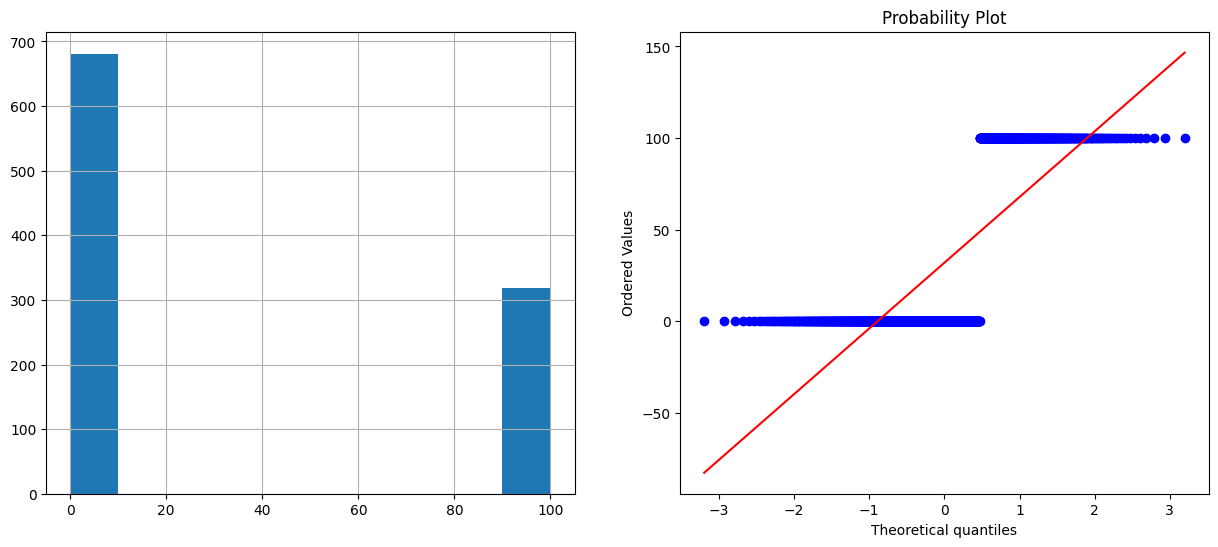

winddir


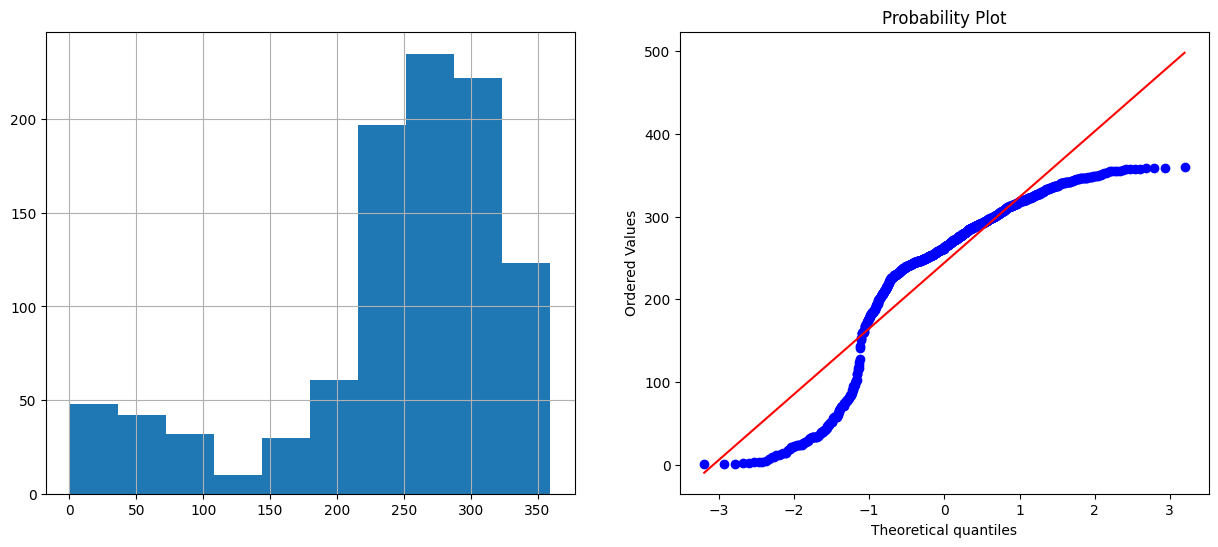

visibility


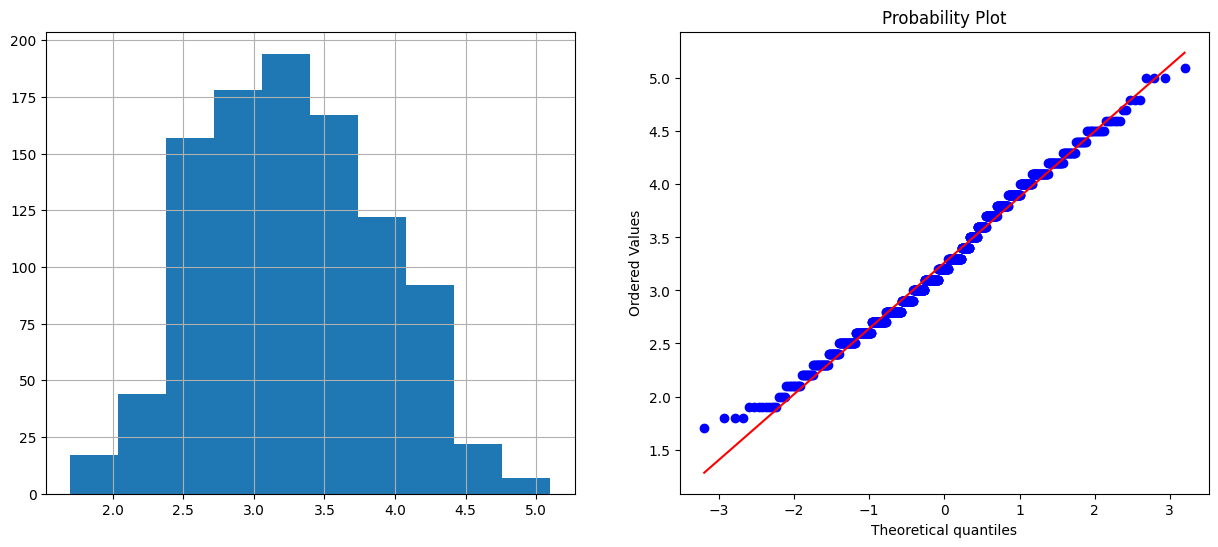

conditions


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

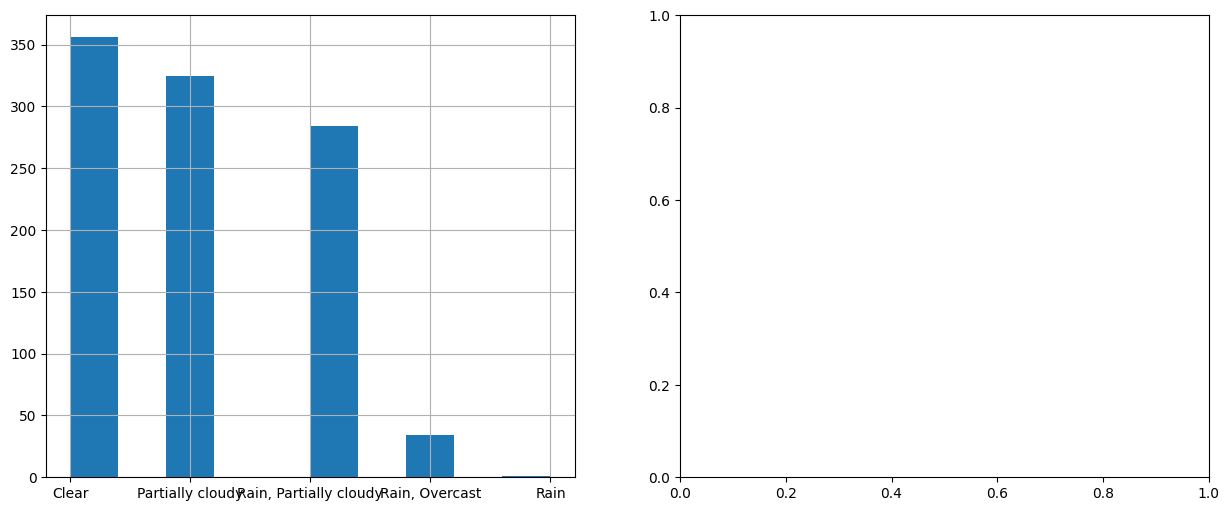

In [32]:
for feature in df:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

In [ ]:
df['precip'].mean()

In [ ]:
data=df.copy()
sns.scatterplot(x = df['precip'],y = df['humidity'])
plt.xlabel('precip')
plt.ylabel('rain')
plt.title(feature)
plt.figure(figsize=(15,15))
plt.show()

In [ ]:
sns.displot?


In [7]:
X = df[['tempmax', 'tempmin',
       'temp','feelslike', 'humidity',
       'winddir'
       ]].values
y = df[['precip']].values

In [8]:
import pandas
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

x_train, x_test,y_train,y_test = train_test_split(X,y,test_size =0.2)
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)
regressor.fit(x_train,y_train.ravel())

print(regr.coef_)

[[-0.44324383 -0.56193459 10.52343624 -7.60123819  1.87570559 -0.01644393]]


In [38]:
predictedCO2 = regr.predict([[30.07,28.238889,30.07,32.37,57,259,]])


In [39]:
predictedCO2

array([[-0.99262241]])

In [40]:
predictedCO2 = regr.predict([[28.0,	25.9,	26.7,	29.0,	95.0,	272.6]])


In [41]:
df = df[['tempmax', 'tempmin',
       'temp','feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'winddir',
       'visibility', 'conditions']]

In [42]:
df

,tempmax,tempmin,temp,feelslike,dew,humidity,precip,precipprob,winddir,visibility,conditions
0,31.3,19.3,25.0,25.1,16.0,58.9,0.0,0,322.1,2.5,Clear
1,28.9,17.9,24.4,24.5,15.1,57.3,0.0,0,319.8,2.5,Clear
2,30.6,19.1,25.0,25.3,18.9,70.3,0.0,0,287.4,2.1,Clear
3,30.6,19.1,25.2,25.5,18.9,69.8,0.0,0,324.2,2.0,Clear
4,30.7,20.7,25.2,25.4,17.6,64.3,0.0,0,323.8,2.7,Clear
...,...,...,...,...,...,...,...,...,...,...,...
995,28.0,25.9,26.7,29.0,25.8,95.0,135.0,100,272.6,2.3,"Rain, Partially cloudy"
996,28.0,24.9,26.0,26.7,25.7,98.2,266.0,100,251.7,1.9,"Rain, Partially cloudy"
997,30.2,24.9,27.4,31.3,25.8,91.6,0.5,100,181.9,2.9,"Rain, Partially cloudy"
998,30.0,26.0,28.0,32.8,25.6,86.9,0.0,0,251.8,3.1,Partially cloudy


In [43]:
predictedCO2

array([[57.03995937]])

In [ ]:
regr.predict(x_test)

array([[ 1.45526339e+00],
       [ 1.57204597e+01],
       [ 2.04156214e+01],
       [ 3.04516723e+00],
       [ 8.58879581e+00],
       [-9.29636017e+00],
       [ 1.25612654e+00],
       [ 1.26375337e+01],
       [ 2.49616256e+00],
       [-4.61374040e+00],
       [ 2.55898155e+01],
       [-1.70041928e+00],
       [ 2.07440324e+01],
       [-8.40438320e+00],
       [ 3.69706638e+01],
       [ 1.64851258e+01],
       [ 6.35384635e+00],
       [-1.19732170e+00],
       [-1.46010025e+01],
       [ 9.37768308e+00],
       [-7.68502854e+00],
       [ 2.93647938e+01],
       [ 3.77958412e+01],
       [ 5.85867136e+00],
       [ 2.23824019e+01],
       [ 1.39461755e+00],
       [ 2.55605783e+01],
       [-6.24578744e+00],
       [ 1.83614800e+01],
       [ 3.52810520e+01],
       [ 2.37758984e+01],
       [-2.00269177e+01],
       [ 7.42940793e-01],
       [ 2.22048523e+01],
       [ 7.03903756e+00],
       [-1.22047576e+01],
       [-1.34304955e+01],
       [-2.42316882e+01],
       [ 2.5

In [45]:
regr.score(x_test,y_test)

0.32355010137568674

In [46]:
df[['tempmax', 'tempmin',
       'temp','feelslike', 'humidity',
       'winddir'
       ]].values[:10]

array([[ 31.3,  19.3,  25. ,  25.1,  58.9, 322.1],
       [ 28.9,  17.9,  24.4,  24.5,  57.3, 319.8],
       [ 30.6,  19.1,  25. ,  25.3,  70.3, 287.4],
       [ 30.6,  19.1,  25.2,  25.5,  69.8, 324.2],
       [ 30.7,  20.7,  25.2,  25.4,  64.3, 323.8],
       [ 30.9,  19.3,  24.7,  24.5,  51.3, 337.6],
       [ 28.9,  17.6,  23.6,  23.4,  47.5, 335.2],
       [ 28.9,  17.6,  23.6,  23.7,  60.9, 309.9],
       [ 31.6,  19.4,  25.4,  25.7,  64.4,  14.4],
       [ 33.9,  20.6,  27. ,  27.1,  55.8,  42.4]])

In [47]:
df[['precip']].values[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [48]:
y.shape

(1000, 1)

In [62]:
regressor.score(x_test,y_test)

0.7770593871334824

In [50]:
x =[[28.0,	25.9,	26.7,	29.0,	95.0,	272.6]]

In [51]:
regressor.predict(x)

array([123.278])

In [52]:
x_test

array([[ 33.9,  23.6,  28.7,  29.3,  54.8, 340.6],
       [ 29.5,  21.4,  25.9,  26.2,  63.5, 309.8],
       [ 31.3,  26.8,  28.4,  33.6,  84. , 223.6],
       ...,
       [ 35.6,  23. ,  29.4,  29.5,  45.8,   1. ],
       [ 32.1,  27.4,  29.5,  36.2,  80.7, 225.2],
       [ 32. ,  26. ,  28.4,  33.8,  89.1, 183. ]])

In [17]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [9]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [10]:
regressor2 = xgb.XGBRegressor(
    n_estimators=200,
    reg_lambda=1,
    gamma=0,
    max_depth=5
)

In [11]:
regressor2.fit(x_train, y_train.ravel())


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [31]:
regressor2.score(x_test,y_test)

0.5618866472791817

In [22]:
regressor2.predict(x)

NameError: name 'x' is not defined

In [23]:
import pickle
pickle.dump(regressor2, open('model.pkl', 'wb'))

In [24]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.score(x_test,y_test)

0.5618866472791817

In [25]:
pickled_model.predict(x)

NameError: name 'x' is not defined

In [26]:
from platform import python_version

In [27]:
python_version(xgboost)

NameError: name 'xgboost' is not defined

In [10]:
xgboost.__version__

NameError: name 'xgboost' is not defined

In [12]:
import catboost as cb


ModuleNotFoundError: No module named 'catboost'

In [1]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement catboost (from versions: 0.1.1)
ERROR: No matching distribution found for catboost
